In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OFDM Parameters
num_subcarriers = 64 # Number of subcarriers (N)
num_symbols = 10     # Number of OFDM symbols (M)  
cp_len = 16          # Length of Cyclic Prefix (CP)
mod_order = 4        # QAM modulation order (e.g QPSK -> 4)

In [3]:
# Generate random QAM Symbols for each subcarrier
data = np.random.randint(0, mod_order, size=(num_symbols, num_subcarriers))
qam_symbols = np.exp(1j * 2 * np.pi * data / mod_order)

In [4]:
# Perform IFFT on each OFDM symbol (modulate subcarriers)
ifft_output = np.fft.ifft(qam_symbols, axis=1)

In [5]:
# Add Cyclic Prefix (CP)
cyclic_prefix = ifft_output[:, -cp_len:]
ofdm_symbols_with_cp = np.hstack([cyclic_prefix, ifft_output])

In [6]:
# Flatten into a 1D signal for transmission
ofdm_signal = ofdm_symbols_with_cp.flatten()

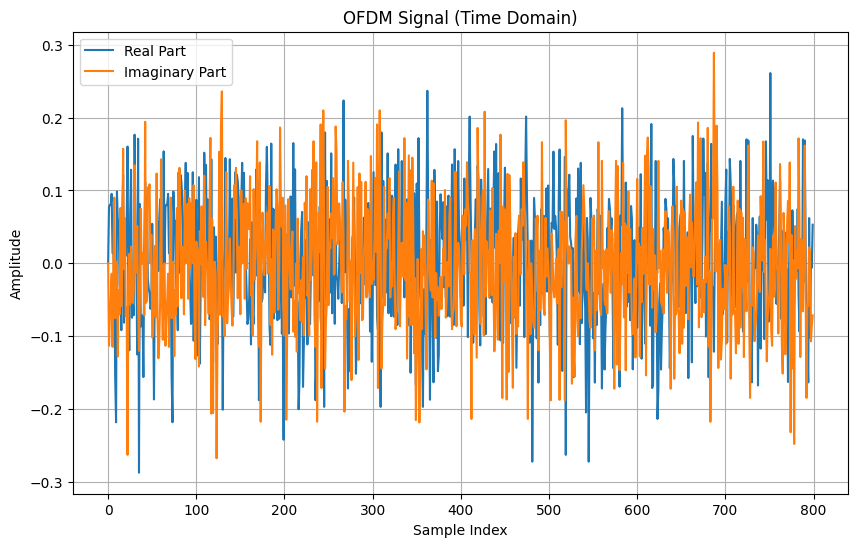

In [7]:
# Plot the real & imaginary parts of the OFDM signal
plt.figure(figsize=(10, 6))
plt.plot(np.real(ofdm_signal), label='Real Part')
plt.plot(np.imag(ofdm_signal), label='Imaginary Part')
plt.title('OFDM Signal (Time Domain)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()